<a href="https://colab.research.google.com/github/vlamen/tue-deeplearning/blob/main/assignments/assignment_2_3/a2_skeleton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group Number:

# Student 1: Kaiting Liu

# Student 2: Sihan Zhu

# Student 3: Ruozhu Yao

# Downloading Data and Preliminaries

In [ ]:
import pickle
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from zipfile import ZipFile
import requests
import io

In [ ]:
def load_zip(url):
    response = requests.get(url)
    response.raise_for_status()
    zipf = ZipFile(io.BytesIO(response.content))
    return {name: zipf.read(name) for name in zipf.namelist()}

def load_array(zipfile, fn):
    return np.load(io.BytesIO(zipfile[fn]))

In [ ]:
"""
This cell loads the training, validation or test data as numpy arrays,
with the positions, initial velocities and charge data of the particles.

The position arrays are shaped as
[simulation id, time point (corresponding to t = 0, 0.5, 1 or 1.5), x/y spatial dimension, particle id].

The initial velocity arrays are shaped as
[simulation id, 1 (corresponding to t=0), x/y spatial dimension, particle id].

The charge arrays are shaped as [simulation id, particle id, 1]

"""

data = load_zip('https://surfdrive.surf.nl/files/index.php/s/OIgda2ZRG8v0eqB/download')

features = ['positions', 'velocities', 'charges']
    
positions_train, velocities_train, charges_train = (load_array(data, f'data/train/{f}.npy') for f in features)
positions_valid, velocities_valid, charges_valid = (load_array(data, f'data/valid/{f}.npy') for f in features)
positions_test, velocities_test, charges_test = (load_array(data, f'data/test/{f}.npy') for f in features)

print('Shapes of the training data:\n')
print(f'positions: {positions_train.shape}')
print(f'velocities: {velocities_train.shape}')
print(f'charges: {charges_train.shape}')

Shapes of the training data:

positions: (10000, 4, 2, 5)
velocities: (10000, 1, 2, 5)
charges: (10000, 5, 1)


In [ ]:
print('An example of retrieving data from the arrays:\n\n')

sim_idx = 42
t_idx = 2  # t_idx 0, 1, 2, 3 corresponds to t=0, 0.5, 1 and 1.5 respectively
spatial_idx = (0,1)  # corresponds to both x and y dimension
particle_idx = 3  # corresponds to particle with index 3

p = positions_train[sim_idx, t_idx, spatial_idx, particle_idx]
v = velocities_train[sim_idx, 0, spatial_idx, particle_idx]  # note: this array contains only the inital velocity -> hence the 0
c = charges_train[sim_idx, particle_idx, 0] 

print(
    f'In simulation {sim_idx} of the training set, particle {particle_idx} with charge {c} had coordinates {p}.\nThe initial velocity of this particle was {v}.'
)

An example of retrieving data from the arrays:


In simulation 42 of the training set, particle 3 with charge -1.0 had coordinates [ 2.05159559 -1.46130851].
The initial velocity of this particle was [ 0.28402364 -0.24784824].


In [ ]:
print('Overview of no. datapoints:\n')

print(f'{len(positions_train)} train, {len(positions_valid)} validation, {len(positions_test)} test simulations')

Overview of no. datapoints:

10000 train, 2000 validation, 2000 test simulations


In [ ]:
def plot_example(pos, vel):

    fig = plt.figure()
    axes = plt.gca()
    axes.set_xlim([-5., 5.])
    axes.set_ylim([-5., 5.])
    colors = ['red', 'blue', 'green', 'orange', 'brown']
    for i in range(pos.shape[-1]):
        plt.plot(pos[0, 0, i], pos[0, 1, i], 'd', color=colors[i])
        plt.plot(pos[-1, 0, i], pos[-1, 1, i], 'x', color=colors[i])
        plt.plot([pos[0, 0, i], pos[0, 0, i] + vel[0, 0, i]], [pos[0, 1, i], pos[0, 1, i] + vel[0, 1, i]], '--', color=colors[i])
    fig.set_size_inches(7, 7)
    plt.xlim(np.min(pos)-1, np.max(pos) +1)
    plt.ylim(np.min(pos)-1, np.max(pos) +1)
    plt.plot([], [], 'd', color='black', label='initial position')
    plt.plot([], [], 'x', color='black', label='final position')
    plt.plot([], [], '--', color='black', label='initial velocity \ndirection and magnitude')
    plt.legend()
    
    plt.show()
    return

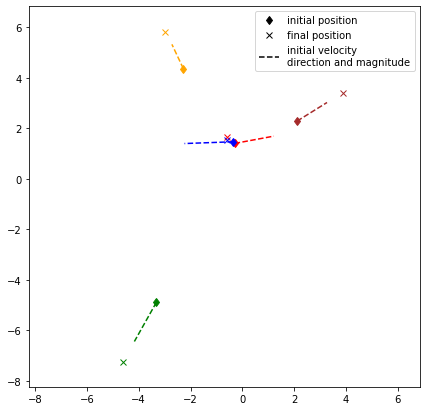

In [ ]:
random_idx = np.random.randint(0, 10000)
plot_example(positions_train[random_idx], velocities_train[random_idx])

# Data Handling and Preprocessing

In [ ]:
#todo

In [ ]:
import torch
from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, TensorDataset
import numpy as np
from PIL import Image

def data_transformation(positions, velocities, charges):
    """
    Transform the original set of 6 images to the set of 3 images, 
    (anchor, support image has same character, support image has different character)
    """
    positions_start = positions[:, 0, :, :]
    velocities_start = velocities[:, 0, :, :]
    charges_start = charges[:, :, :]

    temp = np.concatenate((positions_start, velocities_start), axis=1)
    temp = np.moveaxis(temp, 1, 2)
    input_data = np.concatenate((temp,charges_start), axis=2)

    positions_end = np.moveaxis(positions, 2, 3)
    label_data_1 = positions_end[:, 1, :, :]
    label_data_2 = positions_end[:, 2, :, :]
    label_data_3 = positions_end[:, 3, :, :]

    return input_data, label_data_1, label_data_2, label_data_3

class MyDataset(Dataset):
    def __init__(self, input_data, label_data):
        self.input_data = torch.FloatTensor(input_data)
        self.label_data = torch.FloatTensor(label_data)
        
    def __getitem__(self, index):
        input = self.input_data[index, :, :]
        label = self.label_data[index, :, :]
        return input, label
        
    def __len__(self):
        return len(self.label_data)

# Model Implementation

In [73]:
#todo
from sklearn.metrics import r2_score

In [94]:
## Model Definition ##
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()

        """Embedding extraction, use aggregation function here to utilize neighborhood info""" 
        self.embedding = nn.Sequential(nn.Linear(10, 5), nn.BatchNorm1d(5,momentum=1,affine=True), nn.Sigmoid())

        """Multilayer Perceptron."""
        self.MLP = nn.Sequential(
            nn.Linear(5, 32),
            nn.BatchNorm1d(32,momentum=1,affine=True),
            nn.ReLU(inplace=True),  
            nn.Linear(32, 32),
            nn.BatchNorm1d(32,momentum=1,affine=True),
            nn.ReLU(inplace=True),  
            nn.Linear(32, 2)
        )

    def aggregate(self, x, neighbors):
        """aggregate the info of set for x"""
        neighbors_info = torch.mean(neighbors, axis=1)
        return torch.concat((x,neighbors_info), axis=1)

    def forward(self, input):
        """Perform forward"""
        positions = []
        for idx in range(5):
          aggregation = self.aggregate(input[:, idx, :], np.delete(input, idx, axis=1))
          embedding = self.embedding(aggregation)
          position = self.MLP(embedding)
          positions.append(position)
        positions = torch.stack(positions)
        positions = torch.moveaxis(positions, 0, 1)
        return positions

    def predict(self, input):
        """Perform forward"""
        positions = []
        for idx in range(5):
          aggregation = self.aggregate(input[:, idx, :], np.delete(input, idx, axis=1))
          embedding = self.embedding(aggregation)
          position = self.MLP(embedding)
          positions.append(position)
        positions = torch.stack(positions)
        positions = torch.moveaxis(positions, 0, 1)
        return positions
    
    def baseline_predict(self, inputs,predict_time):
      predictions=[]
      for input in inputs:
        prediction = []
        for point in input:
          px = point[0].item()
          py = point[1].item()
          vx = point[2].item()
          vy = point[3].item()
          new_positions = [px+vx*predict_time,py+vy*predict_time]
          prediction.append(new_positions)
        predictions.append(prediction)
      return predictions

    def score(self, labels, prediction,baseline):
      """
      using full accuracy to evaluate our model performance, 
      by predicting one set is correct when all the images in the set is predicted correctly.
      """
      prediction_arr = prediction.detach().numpy()
      labels_arr = labels.detach().numpy()
      baseline_arr = np.array(baseline)
      predict_label_dist = np.linalg.norm(prediction_arr-labels_arr)
      # print(predict_label_dist)
      baseline_label_dist = np.linalg.norm(baseline-labels_arr)
      # print(baseline_label_dist)
      predict_base_ratio = predict_label_dist/baseline_label_dist

      r2_scores=[]
      for i in range(len(prediction_arr)):
        r2_scores.append(r2_score(labels_arr[i], prediction_arr[i]))
      return np.mean(r2_scores), predict_base_ratio



In [ ]:
## LOSS Definition ##
class MSELoss(nn.Module):
    """
    Mean squared loss
    """

    def __init__(self):
        super(MSELoss, self).__init__()

    def forward(self, prediction, label):
        error = prediction - label
        squared_error = torch.square(error)
        losses = torch.sum(squared_error)
        return losses.mean()

# Model Training

In [ ]:
#todo

In [95]:
import numpy as np
from tqdm import tqdm
import time

class Trainer():
    def __init__(self,
                 device: torch.device,
                 criterion: torch.nn.Module, 
                 epochs: int
                 ):

        self.criterion = criterion
        self.device = device
        self.epochs = epochs


    def run_trainer(self, model, training_DataLoader, valid_DataLoader, optimizer,predict_time):
        avg_losses_per_epoch=[]
        valid_losses=[]
        start = time.time()
        for epoch in tqdm(range(self.epochs)):
            model.train()  # train model
            train_losses=[]
            for batch in training_DataLoader:
                inputs, labels = batch
                # anchor, positive, negative = anchor.to(device=device, dtype=torch.float), positive.to(device=device, dtype=torch.float), negative.to(device=device, dtype=torch.float)
                optimizer.zero_grad()  # zerograd the parameters
                predictions = model(inputs)# one forward pass
                loss = self.criterion(predictions, labels)  # calculate loss
                loss_value = loss.item()
                train_losses.append(loss_value)
                # train_losses.append(loss)
                
                loss.backward()  # one backward pass
                optimizer.step()  # update the parameters
            # print(
            #     f'EPOCH: {epoch+1:0>{len(str(self.epochs))}}/{self.epochs}',
            #     end=' '
            # )
            # train_sim, __=trainer.evaluation(model, training_DataLoader,time = 0.5)
            # val_sim, __=trainer.evaluation(model, valid_DataLoader)
            valid_loss,__,__,__ = self.evaluation(model,valid_DataLoader,predict_time=predict_time)
            valid_losses.append(valid_loss)

            tic = time.time()
            avg_loss=np.mean(train_losses)
            avg_losses_per_epoch.append(avg_loss)
            print(f'Epoch: {epoch+1:0>{len(str(self.epochs))}}/{self.epochs}, train loss: {avg_loss:.4f}, validation loss: {valid_loss:.4f}, Training time so far: {tic-start:.1f} s')
            # train_loss_list = [a.detach().numpy() for a in train_losses]
            # print(f'TRAIN LOSS: {avg_loss:.4f}',end='\n')
        # plt.plot(np.linspace(1, self.epochs, self.epochs, endpoint=True), avg_losses_per_epoch)
        # plt.xlabel('Number of epochs')
        # plt.ylabel('Loss')
        # plt.show()
        return avg_losses_per_epoch,valid_losses

    
    def evaluation(self, model,testing_DataLoader,predict_time=0.5):
        # accuracies = []
        with torch.no_grad():
          model.eval()
          valid_loss = []
          predictions,r2_scores,compare_scores = [],[],[]
          for batch in testing_DataLoader:
            inputs, labels = batch
            prediction = model.predict(inputs)
            # score, prediction = model.score(labels, prediction,predict_time=predict_time)
            loss = self.criterion(prediction,labels)
            baseline = model.baseline_predict(inputs,predict_time)
            r2_score,compare_score = model.score(labels, prediction,baseline)
            # accuracies.append(cos_sim.detach().numpy())
            valid_loss.append(loss.detach().numpy())
            predictions.append(prediction)
            r2_scores.append(r2_score)
            compare_scores.append(compare_score)
        
        # print(valid_loss)
        # print(np.mean(valid_loss))
        # print(predictions)
        # print()
        # print(f'ACCURACY: {np.mean(accuracies):.4f}',end='\n')

        return np.mean(valid_loss),r2_scores,compare_scores,predictions
    
    

In [98]:
# prepare data
input_data, label_data_1, label_data_2, label_data_3 = data_transformation(positions_train, velocities_train, charges_train)
train_dataset_1 = MyDataset(input_data, label_data_1)
train_dataset_2 = MyDataset(input_data, label_data_2)
train_dataset_3 = MyDataset(input_data, label_data_3)

valid_data, valid_label_data_1, valid_label_data_2, valid_label_data_3 = data_transformation(positions_valid, velocities_valid, charges_valid)
valid_dataset_1 = MyDataset(valid_data, valid_label_data_1)
valid_dataset_2 = MyDataset(valid_data, valid_label_data_2)
valid_dataset_3 = MyDataset(valid_data, valid_label_data_3)
valid_DataLoader_1 = torch.utils.data.DataLoader(valid_dataset_1, batch_size=100)
valid_DataLoader_2 = torch.utils.data.DataLoader(valid_dataset_2, batch_size=100)
valid_DataLoader_3 = torch.utils.data.DataLoader(valid_dataset_3, batch_size=100)


# device
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device=torch.device('cpu')
# criterion
criterion = nn.MSELoss()
# nn.L1Loss
# trainer
trainer = Trainer(device=device,
                  criterion=criterion,
                  epochs=50)


# model one: using data in timpoint 0 to predict timepoint 0.5
model_1 = Network().to(device)
# optimizer
# optimizer_1 = torch.optim.SGD(model_1.parameters(), lr=0.0001, momentum=0.5)
optimizer_1 = torch.optim.Adam(model_1.parameters())
# data loader
train_loader_1 = torch.utils.data.DataLoader(train_dataset_1, batch_size=100)
# start training
train_loss,validation_loss = trainer.run_trainer(model_1, train_loader_1,valid_DataLoader_1, optimizer_1,predict_time=0.5)


  2%|▏         | 1/50 [00:01<00:58,  1.19s/it]

Epoch: 01/50, train loss: 2.8737, validation loss: 0.6168, Training time so far: 1.2 s


  4%|▍         | 2/50 [00:02<01:00,  1.26s/it]

Epoch: 02/50, train loss: 0.4117, validation loss: 0.2708, Training time so far: 2.5 s


  6%|▌         | 3/50 [00:03<01:01,  1.30s/it]

Epoch: 03/50, train loss: 0.2956, validation loss: 0.2235, Training time so far: 3.8 s


  8%|▊         | 4/50 [00:05<00:59,  1.29s/it]

Epoch: 04/50, train loss: 0.2599, validation loss: 0.1970, Training time so far: 5.1 s


 10%|█         | 5/50 [00:06<00:59,  1.31s/it]

Epoch: 05/50, train loss: 0.2372, validation loss: 0.1788, Training time so far: 6.5 s


 12%|█▏        | 6/50 [00:07<00:56,  1.29s/it]

Epoch: 06/50, train loss: 0.2203, validation loss: 0.1645, Training time so far: 7.7 s


 14%|█▍        | 7/50 [00:09<00:55,  1.29s/it]

Epoch: 07/50, train loss: 0.2071, validation loss: 0.1559, Training time so far: 9.0 s


 16%|█▌        | 8/50 [00:10<00:53,  1.27s/it]

Epoch: 08/50, train loss: 0.1963, validation loss: 0.1452, Training time so far: 10.2 s


 18%|█▊        | 9/50 [00:11<00:51,  1.27s/it]

Epoch: 09/50, train loss: 0.1871, validation loss: 0.1333, Training time so far: 11.5 s


 20%|██        | 10/50 [00:12<00:52,  1.31s/it]

Epoch: 10/50, train loss: 0.1789, validation loss: 0.1205, Training time so far: 12.9 s


 22%|██▏       | 11/50 [00:14<00:50,  1.30s/it]

Epoch: 11/50, train loss: 0.1718, validation loss: 0.1217, Training time so far: 14.2 s


 24%|██▍       | 12/50 [00:15<00:49,  1.30s/it]

Epoch: 12/50, train loss: 0.1660, validation loss: 0.1152, Training time so far: 15.5 s


 26%|██▌       | 13/50 [00:16<00:48,  1.31s/it]

Epoch: 13/50, train loss: 0.1618, validation loss: 0.1170, Training time so far: 16.8 s


 28%|██▊       | 14/50 [00:18<00:46,  1.30s/it]

Epoch: 14/50, train loss: 0.1585, validation loss: 0.1148, Training time so far: 18.1 s


 30%|███       | 15/50 [00:19<00:45,  1.29s/it]

Epoch: 15/50, train loss: 0.1559, validation loss: 0.1130, Training time so far: 19.4 s


 32%|███▏      | 16/50 [00:20<00:42,  1.26s/it]

Epoch: 16/50, train loss: 0.1536, validation loss: 0.1147, Training time so far: 20.6 s


 34%|███▍      | 17/50 [00:21<00:41,  1.26s/it]

Epoch: 17/50, train loss: 0.1516, validation loss: 0.1146, Training time so far: 21.8 s


 36%|███▌      | 18/50 [00:23<00:40,  1.25s/it]

Epoch: 18/50, train loss: 0.1498, validation loss: 0.1160, Training time so far: 23.0 s


 38%|███▊      | 19/50 [00:24<00:38,  1.25s/it]

Epoch: 19/50, train loss: 0.1481, validation loss: 0.1073, Training time so far: 24.3 s


 40%|████      | 20/50 [00:25<00:37,  1.25s/it]

Epoch: 20/50, train loss: 0.1466, validation loss: 0.1134, Training time so far: 25.5 s


 42%|████▏     | 21/50 [00:26<00:35,  1.24s/it]

Epoch: 21/50, train loss: 0.1451, validation loss: 0.1145, Training time so far: 26.7 s


 44%|████▍     | 22/50 [00:27<00:34,  1.24s/it]

Epoch: 22/50, train loss: 0.1438, validation loss: 0.1104, Training time so far: 28.0 s


 46%|████▌     | 23/50 [00:29<00:33,  1.24s/it]

Epoch: 23/50, train loss: 0.1425, validation loss: 0.1056, Training time so far: 29.2 s


 48%|████▊     | 24/50 [00:30<00:32,  1.24s/it]

Epoch: 24/50, train loss: 0.1414, validation loss: 0.1076, Training time so far: 30.5 s


 50%|█████     | 25/50 [00:31<00:31,  1.25s/it]

Epoch: 25/50, train loss: 0.1402, validation loss: 0.1035, Training time so far: 31.7 s


 52%|█████▏    | 26/50 [00:32<00:30,  1.25s/it]

Epoch: 26/50, train loss: 0.1391, validation loss: 0.1036, Training time so far: 33.0 s


 54%|█████▍    | 27/50 [00:34<00:29,  1.28s/it]

Epoch: 27/50, train loss: 0.1380, validation loss: 0.1058, Training time so far: 34.3 s


 56%|█████▌    | 28/50 [00:35<00:27,  1.26s/it]

Epoch: 28/50, train loss: 0.1370, validation loss: 0.1010, Training time so far: 35.6 s


 58%|█████▊    | 29/50 [00:36<00:26,  1.25s/it]

Epoch: 29/50, train loss: 0.1361, validation loss: 0.1062, Training time so far: 36.8 s


 60%|██████    | 30/50 [00:37<00:24,  1.24s/it]

Epoch: 30/50, train loss: 0.1352, validation loss: 0.1010, Training time so far: 38.0 s


 62%|██████▏   | 31/50 [00:39<00:23,  1.23s/it]

Epoch: 31/50, train loss: 0.1343, validation loss: 0.0961, Training time so far: 39.2 s


 64%|██████▍   | 32/50 [00:40<00:22,  1.24s/it]

Epoch: 32/50, train loss: 0.1335, validation loss: 0.0996, Training time so far: 40.5 s


 66%|██████▌   | 33/50 [00:41<00:20,  1.23s/it]

Epoch: 33/50, train loss: 0.1327, validation loss: 0.0923, Training time so far: 41.7 s


 68%|██████▊   | 34/50 [00:42<00:19,  1.23s/it]

Epoch: 34/50, train loss: 0.1320, validation loss: 0.0960, Training time so far: 42.9 s


 70%|███████   | 35/50 [00:44<00:18,  1.21s/it]

Epoch: 35/50, train loss: 0.1313, validation loss: 0.0928, Training time so far: 44.1 s


 72%|███████▏  | 36/50 [00:45<00:16,  1.21s/it]

Epoch: 36/50, train loss: 0.1307, validation loss: 0.0972, Training time so far: 45.3 s


 74%|███████▍  | 37/50 [00:46<00:15,  1.22s/it]

Epoch: 37/50, train loss: 0.1300, validation loss: 0.0926, Training time so far: 46.5 s


 76%|███████▌  | 38/50 [00:48<00:16,  1.34s/it]

Epoch: 38/50, train loss: 0.1294, validation loss: 0.0894, Training time so far: 48.1 s


 78%|███████▊  | 39/50 [00:49<00:14,  1.30s/it]

Epoch: 39/50, train loss: 0.1288, validation loss: 0.0975, Training time so far: 49.4 s


 80%|████████  | 40/50 [00:50<00:12,  1.27s/it]

Epoch: 40/50, train loss: 0.1283, validation loss: 0.0896, Training time so far: 50.6 s


 82%|████████▏ | 41/50 [00:51<00:11,  1.25s/it]

Epoch: 41/50, train loss: 0.1277, validation loss: 0.0899, Training time so far: 51.8 s


 84%|████████▍ | 42/50 [00:52<00:09,  1.25s/it]

Epoch: 42/50, train loss: 0.1272, validation loss: 0.0902, Training time so far: 53.0 s


 86%|████████▌ | 43/50 [00:54<00:08,  1.23s/it]

Epoch: 43/50, train loss: 0.1267, validation loss: 0.0962, Training time so far: 54.2 s


 88%|████████▊ | 44/50 [00:55<00:07,  1.23s/it]

Epoch: 44/50, train loss: 0.1261, validation loss: 0.0953, Training time so far: 55.4 s


 90%|█████████ | 45/50 [00:56<00:06,  1.23s/it]

Epoch: 45/50, train loss: 0.1256, validation loss: 0.0931, Training time so far: 56.7 s


 92%|█████████▏| 46/50 [00:57<00:04,  1.22s/it]

Epoch: 46/50, train loss: 0.1251, validation loss: 0.0956, Training time so far: 57.9 s


 94%|█████████▍| 47/50 [00:59<00:03,  1.21s/it]

Epoch: 47/50, train loss: 0.1246, validation loss: 0.0892, Training time so far: 59.0 s


 96%|█████████▌| 48/50 [01:00<00:02,  1.21s/it]

Epoch: 48/50, train loss: 0.1241, validation loss: 0.0959, Training time so far: 60.2 s


 98%|█████████▊| 49/50 [01:01<00:01,  1.20s/it]

Epoch: 49/50, train loss: 0.1235, validation loss: 0.0918, Training time so far: 61.4 s


100%|██████████| 50/50 [01:02<00:00,  1.25s/it]

Epoch: 50/50, train loss: 0.1230, validation loss: 0.0962, Training time so far: 62.7 s


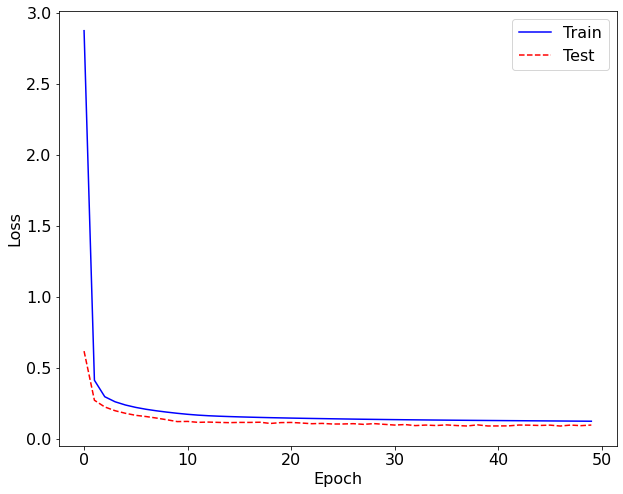

In [99]:
f, ax = plt.subplots(1,1, figsize=(10,8))

fnt=16
ax.plot(train_loss, color='blue', label='Train')
ax.plot(validation_loss, color='red', linestyle='--', label='Test')
ax.legend(fontsize=fnt)
ax.tick_params(axis='both', labelsize=fnt)

ax.set_xlabel("Epoch", fontsize=fnt)
ax.set_ylabel("Loss", fontsize=fnt);

In [100]:
# model two: using data in timpoint 0 to predict timepoint 1
model_2 = Network().to(device)
# optimizer
# optimizer_2 = torch.optim.SGD(model_2.parameters(), lr=0.0001, momentum=0.5)
optimizer_2 =torch.optim.Adam(model_2.parameters())
# data loader
train_loader_2 = torch.utils.data.DataLoader(train_dataset_2, batch_size=100)
# start training
trainer.run_trainer(model_2, train_loader_2, valid_DataLoader_2, optimizer_2,predict_time=1)

# model three: using data in timpoint 0 to predict timepoint 1.5
model_3 = Network().to(device)
# optimizer
# optimizer_3 = torch.optim.SGD(model_3.parameters(), lr=0.0001, momentum=0.5)
optimizer_3 =torch.optim.Adam(model_3.parameters())
# data loader
train_loader_3 = torch.utils.data.DataLoader(train_dataset_3, batch_size=100)
# start training
trainer.run_trainer(model_3, train_loader_3, valid_DataLoader_3, optimizer_3,predict_time=1.5)

  2%|▏         | 1/50 [00:01<00:57,  1.18s/it]

Epoch: 01/50, train loss: 4.4509, validation loss: 1.3067, Training time so far: 1.2 s


  4%|▍         | 2/50 [00:02<00:56,  1.18s/it]

Epoch: 02/50, train loss: 0.7041, validation loss: 0.4195, Training time so far: 2.4 s


  6%|▌         | 3/50 [00:03<00:55,  1.19s/it]

Epoch: 03/50, train loss: 0.4450, validation loss: 0.3696, Training time so far: 3.6 s


  8%|▊         | 4/50 [00:04<00:54,  1.19s/it]

Epoch: 04/50, train loss: 0.3986, validation loss: 0.3455, Training time so far: 4.7 s


 10%|█         | 5/50 [00:05<00:53,  1.19s/it]

Epoch: 05/50, train loss: 0.3687, validation loss: 0.3236, Training time so far: 5.9 s


 12%|█▏        | 6/50 [00:07<00:52,  1.19s/it]

Epoch: 06/50, train loss: 0.3481, validation loss: 0.3079, Training time so far: 7.1 s


 14%|█▍        | 7/50 [00:08<00:51,  1.19s/it]

Epoch: 07/50, train loss: 0.3333, validation loss: 0.2924, Training time so far: 8.3 s


 16%|█▌        | 8/50 [00:09<00:50,  1.19s/it]

Epoch: 08/50, train loss: 0.3211, validation loss: 0.2751, Training time so far: 9.5 s


 18%|█▊        | 9/50 [00:10<00:49,  1.20s/it]

Epoch: 09/50, train loss: 0.3106, validation loss: 0.2588, Training time so far: 10.7 s


 20%|██        | 10/50 [00:11<00:48,  1.21s/it]

Epoch: 10/50, train loss: 0.3008, validation loss: 0.2455, Training time so far: 12.0 s


 22%|██▏       | 11/50 [00:13<00:46,  1.20s/it]

Epoch: 11/50, train loss: 0.2914, validation loss: 0.2326, Training time so far: 13.2 s


 24%|██▍       | 12/50 [00:14<00:45,  1.20s/it]

Epoch: 12/50, train loss: 0.2834, validation loss: 0.2225, Training time so far: 14.3 s


 26%|██▌       | 13/50 [00:15<00:44,  1.21s/it]

Epoch: 13/50, train loss: 0.2765, validation loss: 0.2207, Training time so far: 15.6 s


 28%|██▊       | 14/50 [00:16<00:43,  1.21s/it]

Epoch: 14/50, train loss: 0.2712, validation loss: 0.2098, Training time so far: 16.8 s


 30%|███       | 15/50 [00:17<00:42,  1.21s/it]

Epoch: 15/50, train loss: 0.2667, validation loss: 0.2024, Training time so far: 18.0 s


 32%|███▏      | 16/50 [00:19<00:40,  1.21s/it]

Epoch: 16/50, train loss: 0.2627, validation loss: 0.2042, Training time so far: 19.2 s


 34%|███▍      | 17/50 [00:20<00:40,  1.23s/it]

Epoch: 17/50, train loss: 0.2591, validation loss: 0.2040, Training time so far: 20.5 s


 36%|███▌      | 18/50 [00:21<00:40,  1.25s/it]

Epoch: 18/50, train loss: 0.2558, validation loss: 0.2006, Training time so far: 21.8 s


 38%|███▊      | 19/50 [00:22<00:38,  1.24s/it]

Epoch: 19/50, train loss: 0.2528, validation loss: 0.2042, Training time so far: 23.0 s


 40%|████      | 20/50 [00:24<00:37,  1.25s/it]

Epoch: 20/50, train loss: 0.2501, validation loss: 0.1922, Training time so far: 24.3 s


 42%|████▏     | 21/50 [00:25<00:36,  1.26s/it]

Epoch: 21/50, train loss: 0.2474, validation loss: 0.1929, Training time so far: 25.5 s


 44%|████▍     | 22/50 [00:26<00:35,  1.25s/it]

Epoch: 22/50, train loss: 0.2451, validation loss: 0.1918, Training time so far: 26.8 s


 46%|████▌     | 23/50 [00:27<00:33,  1.24s/it]

Epoch: 23/50, train loss: 0.2429, validation loss: 0.1908, Training time so far: 28.0 s


 48%|████▊     | 24/50 [00:29<00:32,  1.23s/it]

Epoch: 24/50, train loss: 0.2409, validation loss: 0.1812, Training time so far: 29.2 s


 50%|█████     | 25/50 [00:30<00:30,  1.22s/it]

Epoch: 25/50, train loss: 0.2389, validation loss: 0.1905, Training time so far: 30.4 s


 52%|█████▏    | 26/50 [00:31<00:29,  1.22s/it]

Epoch: 26/50, train loss: 0.2370, validation loss: 0.1809, Training time so far: 31.6 s


 54%|█████▍    | 27/50 [00:32<00:28,  1.22s/it]

Epoch: 27/50, train loss: 0.2353, validation loss: 0.1790, Training time so far: 32.8 s


 56%|█████▌    | 28/50 [00:34<00:26,  1.22s/it]

Epoch: 28/50, train loss: 0.2335, validation loss: 0.1799, Training time so far: 34.1 s


 58%|█████▊    | 29/50 [00:35<00:26,  1.24s/it]

Epoch: 29/50, train loss: 0.2318, validation loss: 0.1762, Training time so far: 35.4 s


 60%|██████    | 30/50 [00:36<00:24,  1.25s/it]

Epoch: 30/50, train loss: 0.2302, validation loss: 0.1818, Training time so far: 36.6 s


 62%|██████▏   | 31/50 [00:37<00:23,  1.24s/it]

Epoch: 31/50, train loss: 0.2287, validation loss: 0.1828, Training time so far: 37.8 s


 64%|██████▍   | 32/50 [00:39<00:22,  1.23s/it]

Epoch: 32/50, train loss: 0.2272, validation loss: 0.1838, Training time so far: 39.1 s


 66%|██████▌   | 33/50 [00:40<00:20,  1.23s/it]

Epoch: 33/50, train loss: 0.2257, validation loss: 0.1864, Training time so far: 40.3 s


 68%|██████▊   | 34/50 [00:41<00:19,  1.23s/it]

Epoch: 34/50, train loss: 0.2243, validation loss: 0.1838, Training time so far: 41.5 s


 70%|███████   | 35/50 [00:42<00:18,  1.23s/it]

Epoch: 35/50, train loss: 0.2230, validation loss: 0.1883, Training time so far: 42.8 s


 72%|███████▏  | 36/50 [00:43<00:17,  1.22s/it]

Epoch: 36/50, train loss: 0.2217, validation loss: 0.1780, Training time so far: 44.0 s


 74%|███████▍  | 37/50 [00:45<00:15,  1.21s/it]

Epoch: 37/50, train loss: 0.2206, validation loss: 0.1772, Training time so far: 45.1 s


 76%|███████▌  | 38/50 [00:46<00:15,  1.27s/it]

Epoch: 38/50, train loss: 0.2195, validation loss: 0.1764, Training time so far: 46.5 s


 78%|███████▊  | 39/50 [00:47<00:13,  1.26s/it]

Epoch: 39/50, train loss: 0.2185, validation loss: 0.1763, Training time so far: 47.8 s


 80%|████████  | 40/50 [00:49<00:12,  1.26s/it]

Epoch: 40/50, train loss: 0.2176, validation loss: 0.1701, Training time so far: 49.0 s


 82%|████████▏ | 41/50 [00:50<00:11,  1.26s/it]

Epoch: 41/50, train loss: 0.2167, validation loss: 0.1727, Training time so far: 50.3 s


 84%|████████▍ | 42/50 [00:52<00:11,  1.41s/it]

Epoch: 42/50, train loss: 0.2159, validation loss: 0.1836, Training time so far: 52.1 s


 86%|████████▌ | 43/50 [00:53<00:09,  1.37s/it]

Epoch: 43/50, train loss: 0.2150, validation loss: 0.1827, Training time so far: 53.3 s


 88%|████████▊ | 44/50 [00:54<00:07,  1.32s/it]

Epoch: 44/50, train loss: 0.2142, validation loss: 0.1768, Training time so far: 54.5 s


 90%|█████████ | 45/50 [00:55<00:06,  1.29s/it]

Epoch: 45/50, train loss: 0.2134, validation loss: 0.1809, Training time so far: 55.8 s


 92%|█████████▏| 46/50 [00:56<00:05,  1.27s/it]

Epoch: 46/50, train loss: 0.2127, validation loss: 0.1805, Training time so far: 57.0 s


 94%|█████████▍| 47/50 [00:58<00:03,  1.26s/it]

Epoch: 47/50, train loss: 0.2119, validation loss: 0.1718, Training time so far: 58.2 s


 96%|█████████▌| 48/50 [00:59<00:02,  1.25s/it]

Epoch: 48/50, train loss: 0.2112, validation loss: 0.1720, Training time so far: 59.4 s


 98%|█████████▊| 49/50 [01:00<00:01,  1.25s/it]

Epoch: 49/50, train loss: 0.2105, validation loss: 0.1764, Training time so far: 60.7 s


100%|██████████| 50/50 [01:01<00:00,  1.24s/it]


Epoch: 50/50, train loss: 0.2099, validation loss: 0.1799, Training time so far: 61.9 s


  2%|▏         | 1/50 [00:01<01:00,  1.23s/it]

Epoch: 01/50, train loss: 6.3099, validation loss: 2.0092, Training time so far: 1.2 s


  4%|▍         | 2/50 [00:02<00:59,  1.24s/it]

Epoch: 02/50, train loss: 1.0803, validation loss: 0.6372, Training time so far: 2.5 s


  6%|▌         | 3/50 [00:03<00:57,  1.23s/it]

Epoch: 03/50, train loss: 0.6599, validation loss: 0.5538, Training time so far: 3.7 s


  8%|▊         | 4/50 [00:04<00:56,  1.22s/it]

Epoch: 04/50, train loss: 0.6009, validation loss: 0.5286, Training time so far: 4.9 s


 10%|█         | 5/50 [00:06<00:55,  1.23s/it]

Epoch: 05/50, train loss: 0.5619, validation loss: 0.5054, Training time so far: 6.2 s


 12%|█▏        | 6/50 [00:07<00:54,  1.24s/it]

Epoch: 06/50, train loss: 0.5336, validation loss: 0.4881, Training time so far: 7.4 s


 14%|█▍        | 7/50 [00:08<00:53,  1.24s/it]

Epoch: 07/50, train loss: 0.5114, validation loss: 0.4832, Training time so far: 8.7 s


 16%|█▌        | 8/50 [00:09<00:52,  1.25s/it]

Epoch: 08/50, train loss: 0.4929, validation loss: 0.4764, Training time so far: 9.9 s


 18%|█▊        | 9/50 [00:11<00:52,  1.27s/it]

Epoch: 09/50, train loss: 0.4768, validation loss: 0.4617, Training time so far: 11.3 s


 20%|██        | 10/50 [00:12<00:50,  1.26s/it]

Epoch: 10/50, train loss: 0.4625, validation loss: 0.4526, Training time so far: 12.5 s


 22%|██▏       | 11/50 [00:13<00:49,  1.26s/it]

Epoch: 11/50, train loss: 0.4498, validation loss: 0.4480, Training time so far: 13.8 s


 24%|██▍       | 12/50 [00:15<00:47,  1.26s/it]

Epoch: 12/50, train loss: 0.4388, validation loss: 0.4377, Training time so far: 15.0 s


 26%|██▌       | 13/50 [00:16<00:46,  1.26s/it]

Epoch: 13/50, train loss: 0.4294, validation loss: 0.4284, Training time so far: 16.3 s


 28%|██▊       | 14/50 [00:17<00:45,  1.26s/it]

Epoch: 14/50, train loss: 0.4212, validation loss: 0.4190, Training time so far: 17.5 s


 30%|███       | 15/50 [00:18<00:44,  1.26s/it]

Epoch: 15/50, train loss: 0.4141, validation loss: 0.4087, Training time so far: 18.8 s


 32%|███▏      | 16/50 [00:20<00:42,  1.26s/it]

Epoch: 16/50, train loss: 0.4078, validation loss: 0.3993, Training time so far: 20.0 s


 34%|███▍      | 17/50 [00:21<00:41,  1.26s/it]

Epoch: 17/50, train loss: 0.4027, validation loss: 0.3932, Training time so far: 21.3 s


 36%|███▌      | 18/50 [00:22<00:40,  1.27s/it]

Epoch: 18/50, train loss: 0.3982, validation loss: 0.3802, Training time so far: 22.6 s


 38%|███▊      | 19/50 [00:23<00:39,  1.27s/it]

Epoch: 19/50, train loss: 0.3942, validation loss: 0.3833, Training time so far: 23.8 s


 40%|████      | 20/50 [00:25<00:37,  1.25s/it]

Epoch: 20/50, train loss: 0.3905, validation loss: 0.3857, Training time so far: 25.1 s


 42%|████▏     | 21/50 [00:26<00:36,  1.25s/it]

Epoch: 21/50, train loss: 0.3869, validation loss: 0.3670, Training time so far: 26.3 s


 44%|████▍     | 22/50 [00:27<00:35,  1.27s/it]

Epoch: 22/50, train loss: 0.3835, validation loss: 0.3730, Training time so far: 27.6 s


 46%|████▌     | 23/50 [00:28<00:34,  1.26s/it]

Epoch: 23/50, train loss: 0.3804, validation loss: 0.3511, Training time so far: 28.9 s


 48%|████▊     | 24/50 [00:30<00:32,  1.27s/it]

Epoch: 24/50, train loss: 0.3774, validation loss: 0.3536, Training time so far: 30.1 s


 50%|█████     | 25/50 [00:31<00:34,  1.39s/it]

Epoch: 25/50, train loss: 0.3746, validation loss: 0.3618, Training time so far: 31.8 s


 52%|█████▏    | 26/50 [00:33<00:32,  1.35s/it]

Epoch: 26/50, train loss: 0.3721, validation loss: 0.3524, Training time so far: 33.1 s


 54%|█████▍    | 27/50 [00:34<00:30,  1.32s/it]

Epoch: 27/50, train loss: 0.3698, validation loss: 0.3495, Training time so far: 34.3 s


 56%|█████▌    | 28/50 [00:35<00:28,  1.30s/it]

Epoch: 28/50, train loss: 0.3677, validation loss: 0.3449, Training time so far: 35.6 s


 58%|█████▊    | 29/50 [00:36<00:27,  1.29s/it]

Epoch: 29/50, train loss: 0.3657, validation loss: 0.3436, Training time so far: 36.9 s


 60%|██████    | 30/50 [00:38<00:25,  1.27s/it]

Epoch: 30/50, train loss: 0.3639, validation loss: 0.3391, Training time so far: 38.1 s


 62%|██████▏   | 31/50 [00:39<00:23,  1.26s/it]

Epoch: 31/50, train loss: 0.3622, validation loss: 0.3407, Training time so far: 39.3 s


 64%|██████▍   | 32/50 [00:40<00:22,  1.25s/it]

Epoch: 32/50, train loss: 0.3606, validation loss: 0.3346, Training time so far: 40.6 s


 66%|██████▌   | 33/50 [00:41<00:21,  1.27s/it]

Epoch: 33/50, train loss: 0.3592, validation loss: 0.3471, Training time so far: 41.8 s


 68%|██████▊   | 34/50 [00:43<00:20,  1.26s/it]

Epoch: 34/50, train loss: 0.3578, validation loss: 0.3401, Training time so far: 43.1 s


 70%|███████   | 35/50 [00:44<00:18,  1.25s/it]

Epoch: 35/50, train loss: 0.3565, validation loss: 0.3398, Training time so far: 44.3 s


 72%|███████▏  | 36/50 [00:45<00:17,  1.25s/it]

Epoch: 36/50, train loss: 0.3554, validation loss: 0.3445, Training time so far: 45.6 s


 74%|███████▍  | 37/50 [00:46<00:16,  1.26s/it]

Epoch: 37/50, train loss: 0.3543, validation loss: 0.3413, Training time so far: 46.9 s


 76%|███████▌  | 38/50 [00:48<00:15,  1.28s/it]

Epoch: 38/50, train loss: 0.3533, validation loss: 0.3386, Training time so far: 48.2 s


 78%|███████▊  | 39/50 [00:49<00:14,  1.28s/it]

Epoch: 39/50, train loss: 0.3523, validation loss: 0.3437, Training time so far: 49.5 s


 80%|████████  | 40/50 [00:50<00:12,  1.27s/it]

Epoch: 40/50, train loss: 0.3514, validation loss: 0.3314, Training time so far: 50.7 s


 82%|████████▏ | 41/50 [00:51<00:11,  1.27s/it]

Epoch: 41/50, train loss: 0.3504, validation loss: 0.3384, Training time so far: 52.0 s


 84%|████████▍ | 42/50 [00:53<00:10,  1.26s/it]

Epoch: 42/50, train loss: 0.3496, validation loss: 0.3486, Training time so far: 53.2 s


 86%|████████▌ | 43/50 [00:54<00:08,  1.27s/it]

Epoch: 43/50, train loss: 0.3488, validation loss: 0.3461, Training time so far: 54.5 s


 88%|████████▊ | 44/50 [00:55<00:07,  1.27s/it]

Epoch: 44/50, train loss: 0.3480, validation loss: 0.3340, Training time so far: 55.8 s


 90%|█████████ | 45/50 [00:57<00:06,  1.28s/it]

Epoch: 45/50, train loss: 0.3472, validation loss: 0.3311, Training time so far: 57.1 s


 92%|█████████▏| 46/50 [00:58<00:05,  1.29s/it]

Epoch: 46/50, train loss: 0.3465, validation loss: 0.3343, Training time so far: 58.4 s


 94%|█████████▍| 47/50 [00:59<00:03,  1.28s/it]

Epoch: 47/50, train loss: 0.3458, validation loss: 0.3276, Training time so far: 59.6 s


 96%|█████████▌| 48/50 [01:00<00:02,  1.27s/it]

Epoch: 48/50, train loss: 0.3452, validation loss: 0.3461, Training time so far: 60.9 s


 98%|█████████▊| 49/50 [01:02<00:01,  1.26s/it]

Epoch: 49/50, train loss: 0.3446, validation loss: 0.3376, Training time so far: 62.1 s


100%|██████████| 50/50 [01:03<00:00,  1.27s/it]

Epoch: 50/50, train loss: 0.3440, validation loss: 0.3262, Training time so far: 63.4 s


([6.30994653582573,
  1.0802572876214982,
  0.6599365174770355,
  0.6009036582708359,
  0.5619448402523994,
  0.5335549989342689,
  0.5113689556717873,
  0.49294006288051606,
  0.47675350606441497,
  0.4625053536891937,
  0.4498389971256256,
  0.4388190895318985,
  0.4294223701953888,
  0.42120759159326554,
  0.41407044619321826,
  0.4078142249584198,
  0.4026585793495178,
  0.39821775019168854,
  0.3941920432448387,
  0.3904809588193893,
  0.38694979310035704,
  0.3835440030694008,
  0.38035700112581255,
  0.37737789511680603,
  0.37459552198648455,
  0.37208521127700805,
  0.3697511477768421,
  0.36767779529094696,
  0.36574604094028473,
  0.36390537455677985,
  0.36221811652183533,
  0.36059040620923044,
  0.35919253557920455,
  0.3578143660724163,
  0.3565478141605854,
  0.3554107880592346,
  0.3543119843304157,
  0.35331968605518344,
  0.3523405034840107,
  0.3513662129640579,
  0.35044442385435104,
  0.3495793302357197,
  0.3487524951994419,
  0.3479608231782913,
  0.347204804420


# Evaluation

In [68]:
# prepare test data
input_data, label_data_1, label_data_2, label_data_3 = data_transformation(positions_test, velocities_test, charges_test)
test_dataset_1 = MyDataset(input_data, label_data_1)
test_dataset_2 = MyDataset(input_data, label_data_2)
test_dataset_3 = MyDataset(input_data, label_data_3)
# data loader
test_DataLoader_1 = torch.utils.data.DataLoader(test_dataset_1, batch_size=100)
test_DataLoader_2 = torch.utils.data.DataLoader(test_dataset_2, batch_size=100)
test_DataLoader_3 = torch.utils.data.DataLoader(test_dataset_3, batch_size=100)

In [104]:
# MSE loss

# evaluation model1
__, r2_scores_1, compare_scores_1, predictions_1 = trainer.evaluation(model_1, test_DataLoader_1)
# # evaluation model2
__,r2_scores_2, compare_scores_2, predictions_2 = trainer.evaluation(model_2, test_DataLoader_2)
# evaluation model3
__,r2_scores_3, compare_scores_3, predictions_3 = trainer.evaluation(model_3, test_DataLoader_3)

In [89]:
print(np.mean(r2_scores_1),np.mean(compare_scores_1))
print(np.mean(r2_scores_2),np.mean(compare_scores_2))
print(np.mean(r2_scores_3),np.mean(compare_scores_3))

# print(np.mean(score_list_2))
# print(np.mean(score_list_3))

0.9537554746014439 1.4228561312177002
0.9221536824099731 1.0288076098973709
0.9025911913565938 0.6952712408542651


In [134]:
def plot_example(test_example,prediction): # initial position and velocities, and positions in the end
    fig = plt.figure()
    axes = plt.gca()
    axes.set_xlim([-5., 5.])
    axes.set_ylim([-5., 5.])
    initial=test_example[0]
    label=test_example[1]
    pred_list = prediction.tolist()
    test_arr = test_example[0].detach().numpy()
    pos = np.hstack((test_arr[:,:2],prediction))

    colors = ['red', 'blue', 'green', 'orange', 'brown']
    for i in range(initial.shape[-1]):
        plt.plot(initial[i,0], initial[i, 1], 'd', color=colors[i])
        plt.plot(label[i,0], label[i,1], 'x', color=colors[i]) # the correct label
        plt.plot(pred_list[i][0],pred_list[i][1], 'o',color=colors[i])
        plt.plot([initial[i,0], initial[i,0] + initial[i,2]], [initial[i, 1], initial[i, 1] + initial[i,3]], '--', color=colors[i])
    fig.set_size_inches(7, 7)
    plt.xlim(np.min(pos)-1, np.max(pos) +1)
    plt.ylim(np.min(pos)-1, np.max(pos) +1)
    plt.plot([], [], 'd', color='black', label='initial position')
    plt.plot([], [], 'o', color='black', label='predicted final position')
    plt.plot([], [], 'x', color='black', label='actual final position')
    plt.plot([], [], '--', color='black', label='initial velocity \ndirection and magnitude')
    plt.legend()
    
    plt.show()
    return

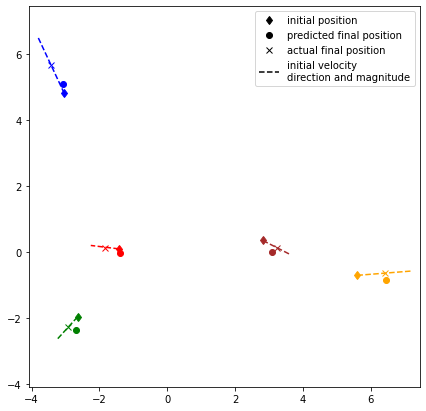

In [151]:
random_idx = np.random.randint(0, 2000)
n_batch = int(random_idx/100)
idx_in_batch = int(random_idx%100)
plot_example(test_dataset_1[random_idx],predictions_1[n_batch][idx_in_batch])

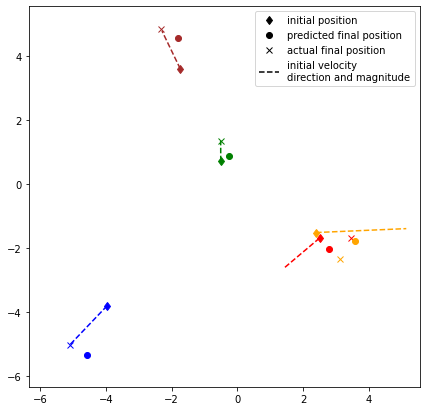

In [165]:
random_idx = np.random.randint(0, 2000)
n_batch = int(random_idx/100)
idx_in_batch = int(random_idx%100)
plot_example(test_dataset_2[random_idx],predictions_2[n_batch][idx_in_batch])

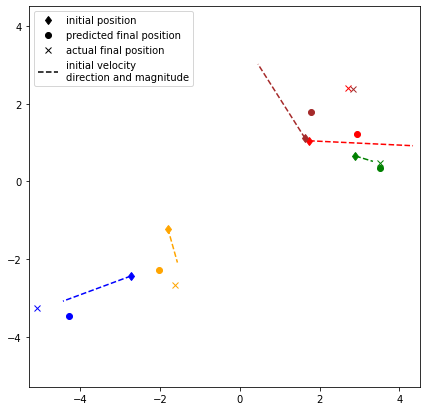

In [155]:
random_idx = np.random.randint(0, 2000)
n_batch = int(random_idx/100)
idx_in_batch = int(random_idx%100)
plot_example(test_dataset_3[random_idx],predictions_3[n_batch][idx_in_batch])